In [1]:
library(igraph)
# install.packages("gsubfn")
library(gsubfn) #allows unpacking multiple return values from functions without using a dummy variable (but needs a fresh R session to work, intitially)

Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Warning message:
"package 'gsubfn' was built under R version 3.6.3"Loading required package: proto
Warning message:
"package 'proto' was built under R version 3.6.3"

In [2]:
#install.packages("resample")
library('resample')


Attaching package: 'resample'

The following object is masked from 'package:gsubfn':

    cat0



In [3]:
library('Matrix')
library('pracma')

Warning message:
"package 'pracma' was built under R version 3.6.3"
Attaching package: 'pracma'

The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu



In [18]:
#install.packages("latex2exp")
library(latex2exp)

package 'latex2exp' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\samur\AppData\Local\Temp\RtmpaGmWka\downloaded_packages


Warning message:
"package 'latex2exp' was built under R version 3.6.3"

In [4]:
printf <- function(...) cat(sprintf(...))

In [5]:
logspace <- function( d1, d2, n) exp(log(10)*seq(d1, d2, length.out=n))

# Part 2

## Q1

## (a)

In [6]:
g <- sample_gnp(n=1000, p=0.01, directed=F)

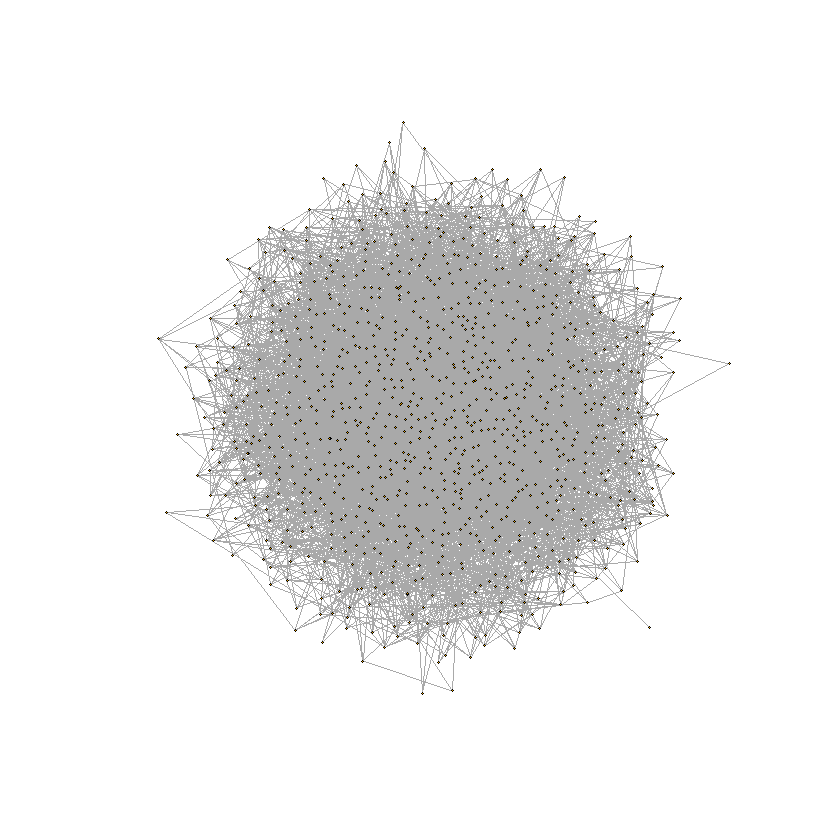

In [8]:
plot(g, vertex.size=1, vertex.label=NA)

In [9]:
setEPS()
postscript("plots/p1q2_1_a.eps")
plot(g, vertex.size=1, vertex.label=NA)
dev.off()

png 
  2

## (b)

In [10]:
get_freq_distr = function(vec){
    return ( list(as.numeric(names(table(vec))), as.vector(table(vec))) ) 
}

In [11]:
get_gcc = function(g){
    if(is_connected(g)) return (g)
    else{
        g.components <- clusters(g)
        gcc_idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == gcc_idx))
        return (gcc)
    }
}

In [12]:
perform_random_walk = function(g, steps=100, iters=1000){
    shortest_dists = matrix(NA, nrow=iters, ncol=steps)
    terminal_node_deg = array(NA, iters)
    for(i in 1:iters){
        gcc <- get_gcc(g)
        #print(V(gcc))
        start_vert = sample(V(gcc), 1)
        vert_seq = random_walk(gcc, start_vert, steps)
        terminal_node_deg[i] = degree(gcc, vert_seq[length(vert_seq)])
        #distances(gcc, start_vert, vert_seq)
        #print(vert_seq)
        shortest_dists[i,] = shortest.paths(gcc, vert_seq, start_vert)
    }
    return (list(shortest_dists, terminal_node_deg))
}

In [13]:
list[shortest_dists, terminal_node_deg] <- perform_random_walk(g)

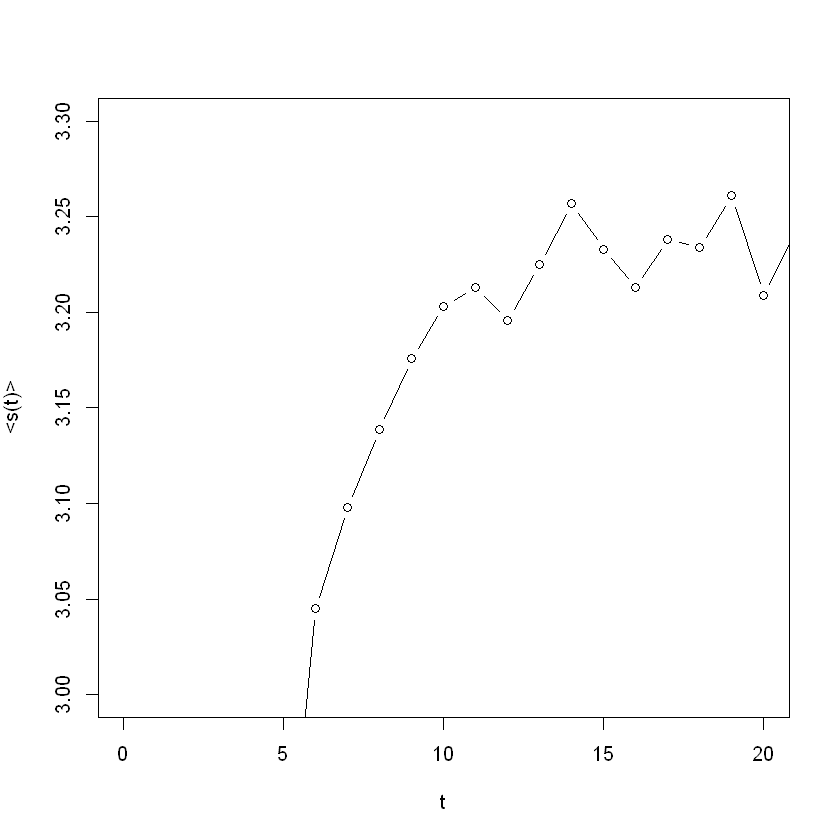

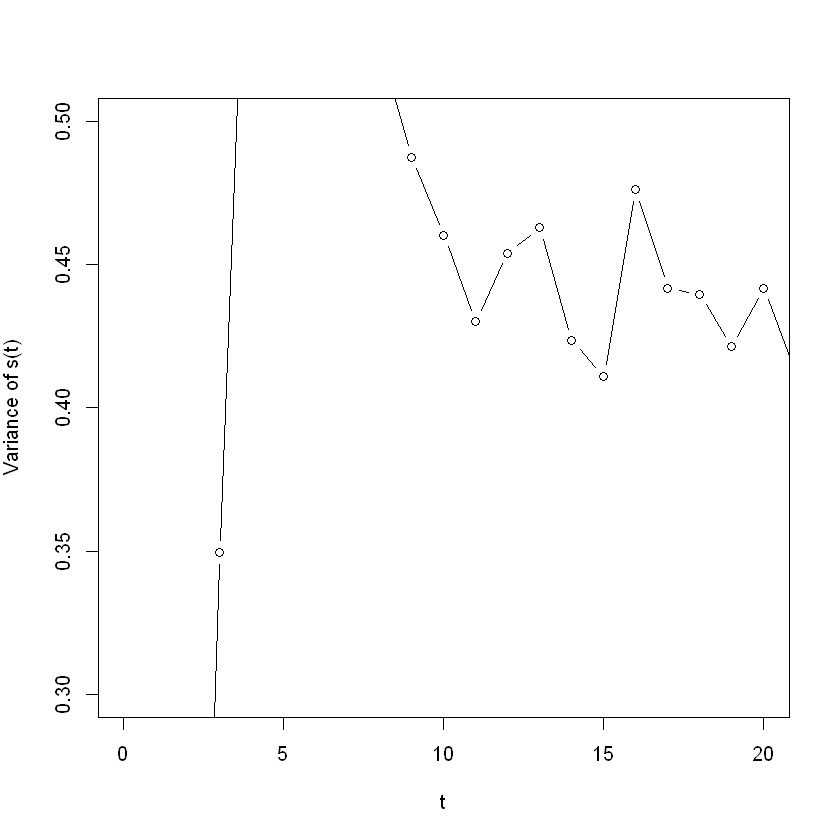

In [95]:
plot(colMeans(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'), xlim=c(0,20), ylim=c(3,3.3))
plot(colVars(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'), xlim=c(0,20), ylim=c(0.3,0.5))

In [47]:
# setEPS()
# postscript("plots/p1q2_1_b_1.eps")
png(sprintf("plots/p1q2_1_b_1.png"))
plot(colMeans(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/p1q2_1_b_2.png"))
plot(colVars(shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

## (c)

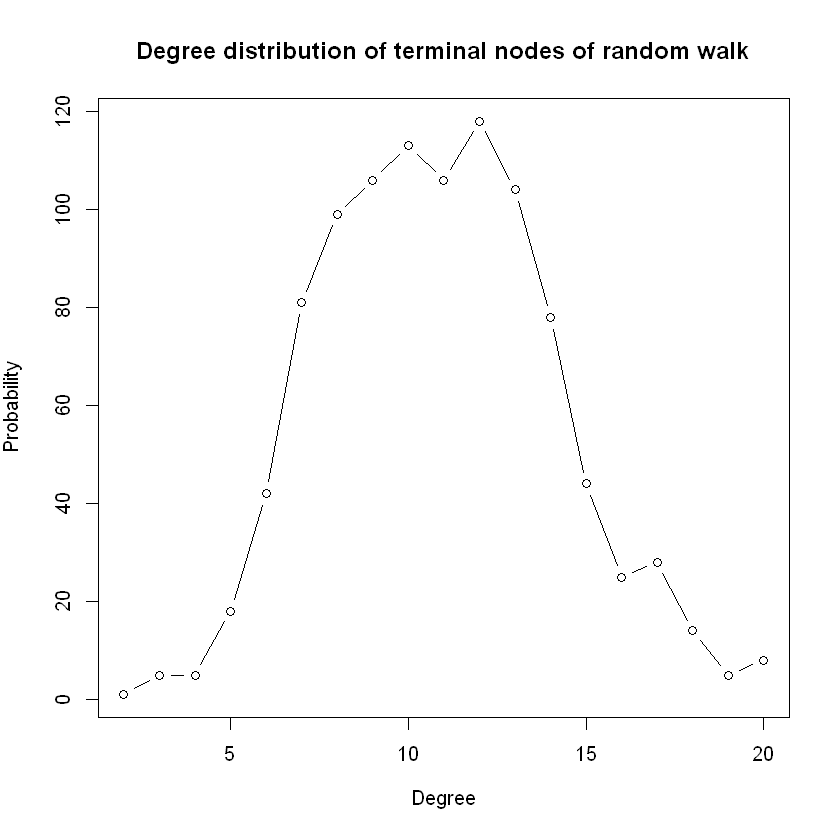

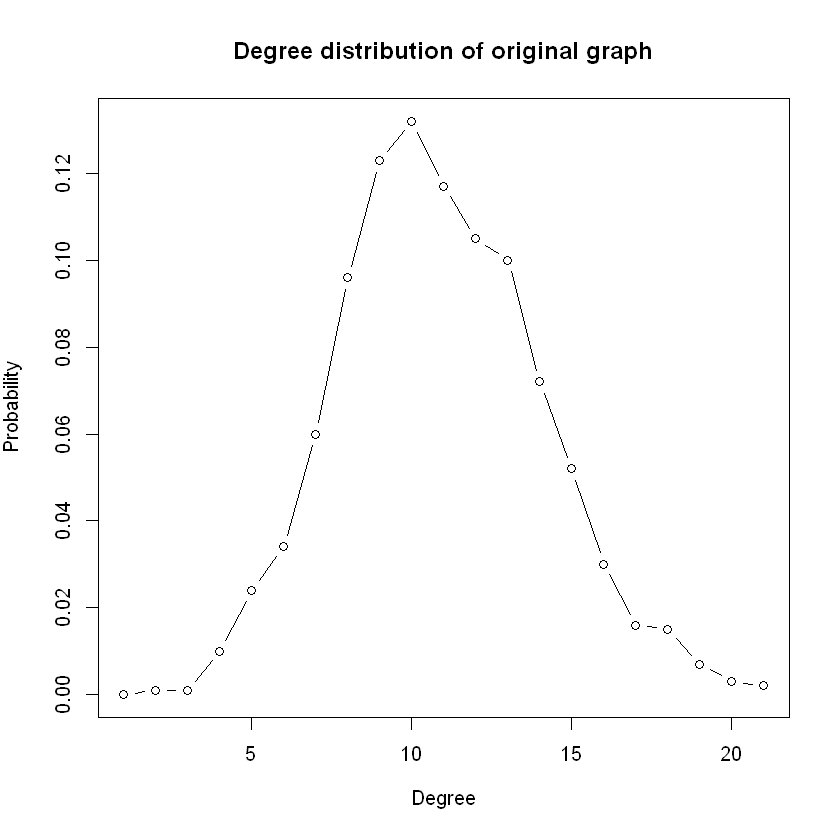

In [79]:
list[degrees, degree_freq] <- get_freq_distr(terminal_node_deg)
plot(degrees, degree_freq, type="b", main="Degree distribution of terminal nodes of random walk", xlab=TeX('Degree'), ylab=TeX('Probability'))
plot(degree_distribution(g), type="b", main="Degree distribution of original graph", xlab=TeX('Degree'), ylab=TeX('Probability'))

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

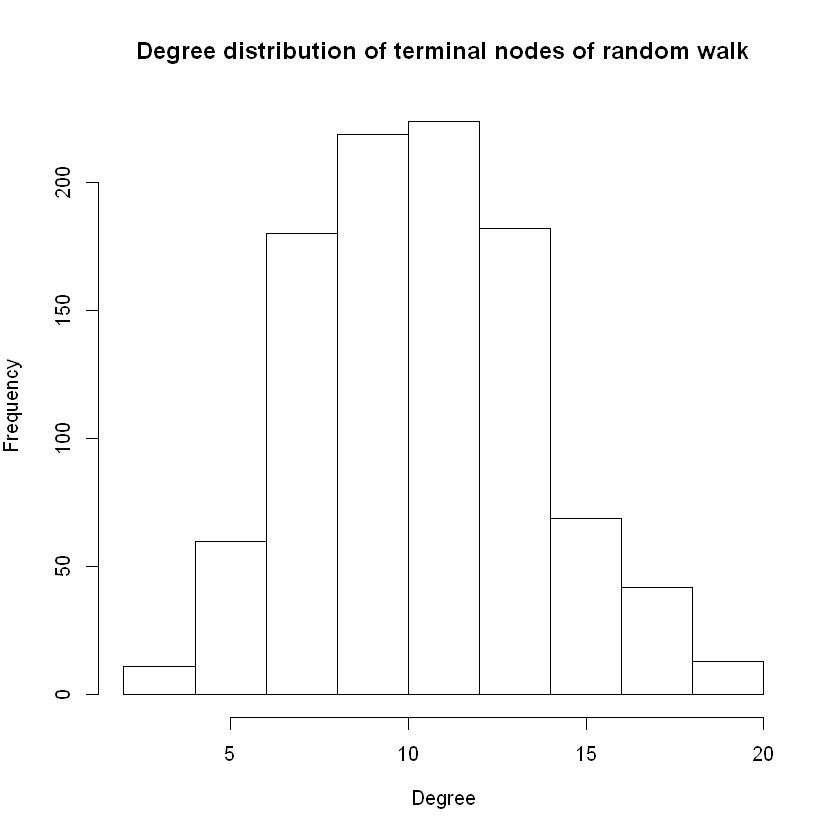

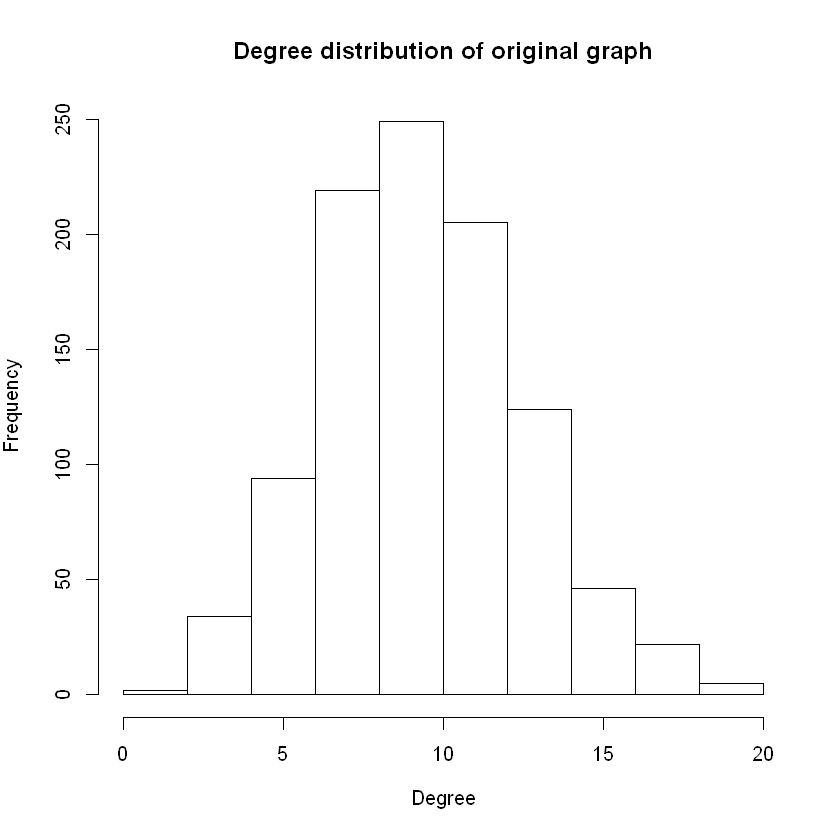

In [84]:
hist(terminal_node_deg, type="b", main="Degree distribution of terminal nodes of random walk", xlab=TeX('Degree'), ylab=TeX('Frequency'))
hist(degree(g), type="b", main="Degree distribution of original graph", xlab=TeX('Degree'), ylab=TeX('Frequency'))

In [88]:
png(sprintf("plots/p1q2_1_c_1_end1.png"))
#plot(degrees, degree_freq, type="b", xlab=TeX('Degree'), ylab=TeX('Probability'))
hist(terminal_node_deg, type="b", main="", xlab=TeX('Degree'), ylab=TeX('Frequency'))
dev.off()
png(sprintf("plots/p1q2_1_c_2_original1.png"))
#plot(degree_distribution(g), type="b", xlab=TeX('Degree'), ylab=TeX('Probability'))
hist(degree(g), type="b", main="", xlab=TeX('Degree'), ylab=TeX('Frequency'))
dev.off()

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

png 
  2

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

png 
  2

## (d)

In [50]:
g1 <- sample_gnp(n=10000, p=0.01, directed=F)

In [51]:
list[shortest_dists1, terminal_node_deg1] <- perform_random_walk(g1)

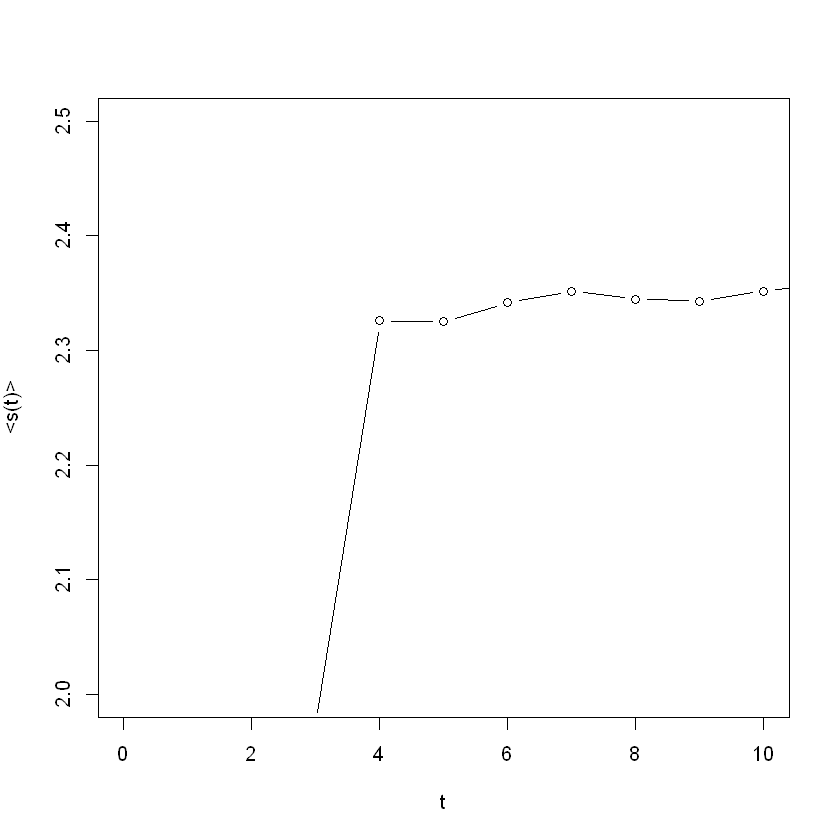

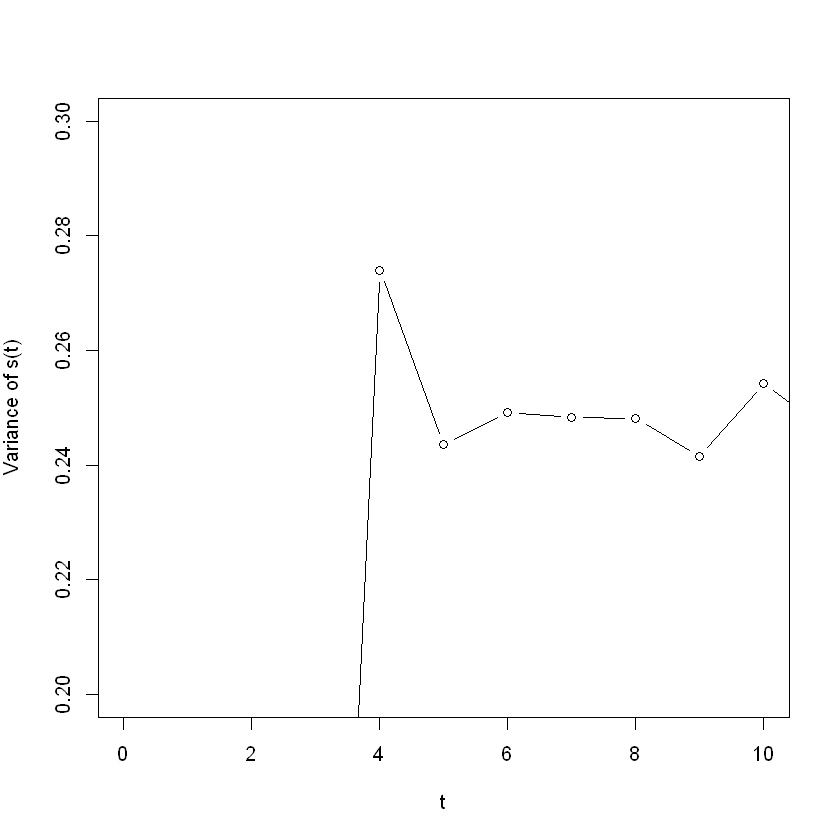

In [97]:
plot(colMeans(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'), xlim=c(0, 10), ylim=c(2,2.5))
plot(colVars(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'), xlim=c(0, 10), ylim=c(0.2,0.3))

In [53]:
png(sprintf("plots/p1q2_1_d_1.png"))
plot(colMeans(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/p1q2_1_d_2.png"))
plot(colVars(shortest_dists1), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

In [98]:
diameter(g)

[1] 5

In [99]:
diameter(g1)

[1] 3

## Q2

## (a)

In [54]:
gg <- sample_pa(n=1000, m=1, directed=F)

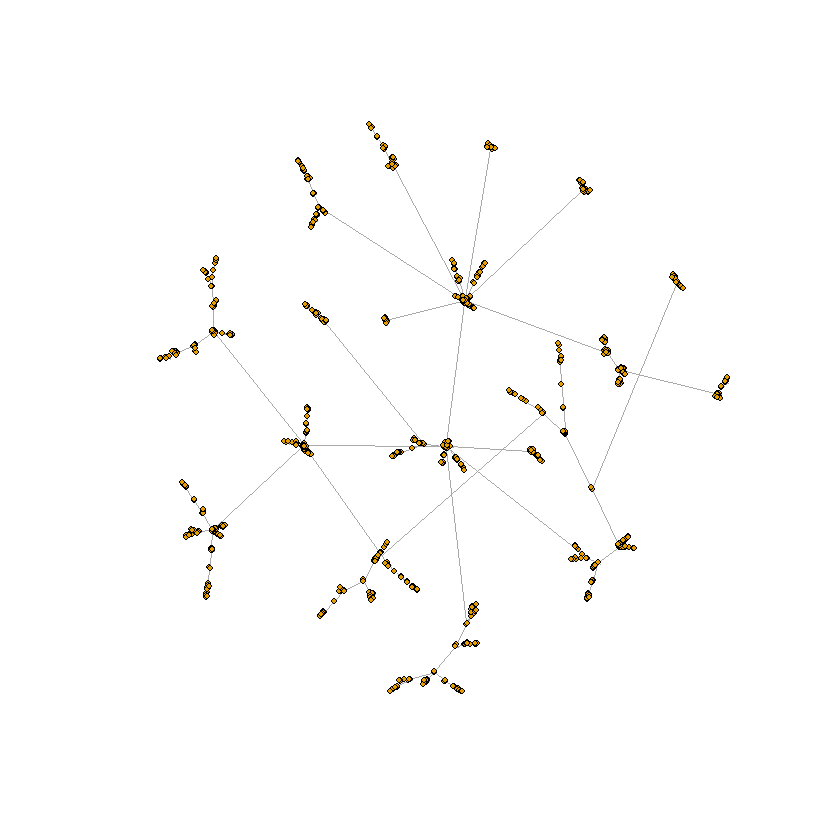

In [101]:
plot(gg, vertex.size=2, vertex.label=NA)

In [102]:
png(sprintf("plots/p1q2_2_a.png"))
plot(gg, vertex.size=2, vertex.label=NA)
dev.off()

png 
  2

## (b)

In [112]:
list[gg_shortest_dists, gg_terminal_node_deg] <- perform_random_walk(gg, steps=800)

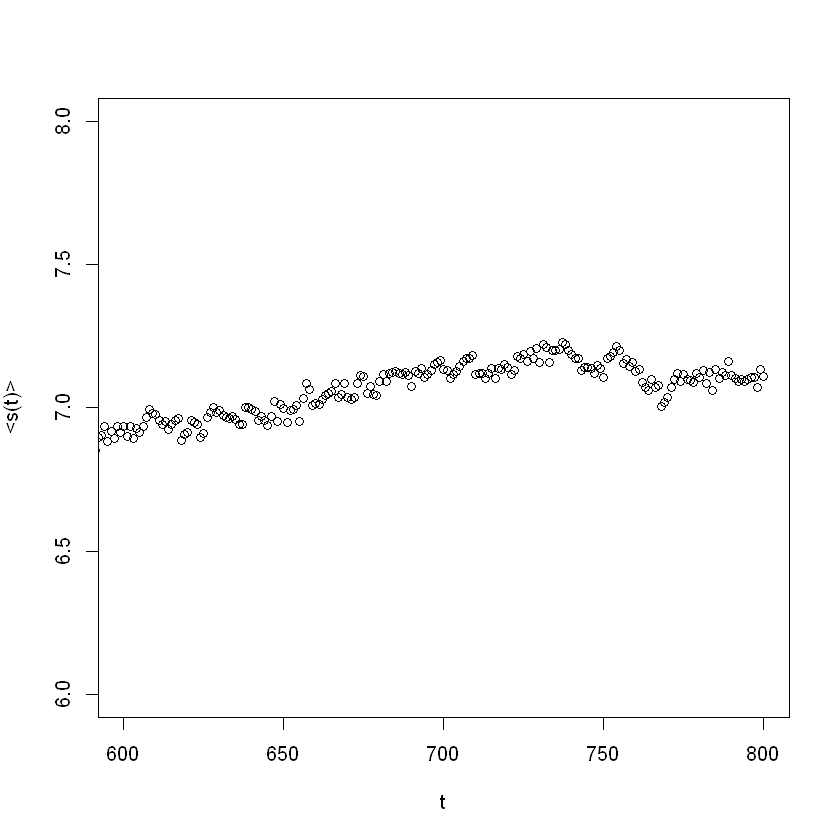

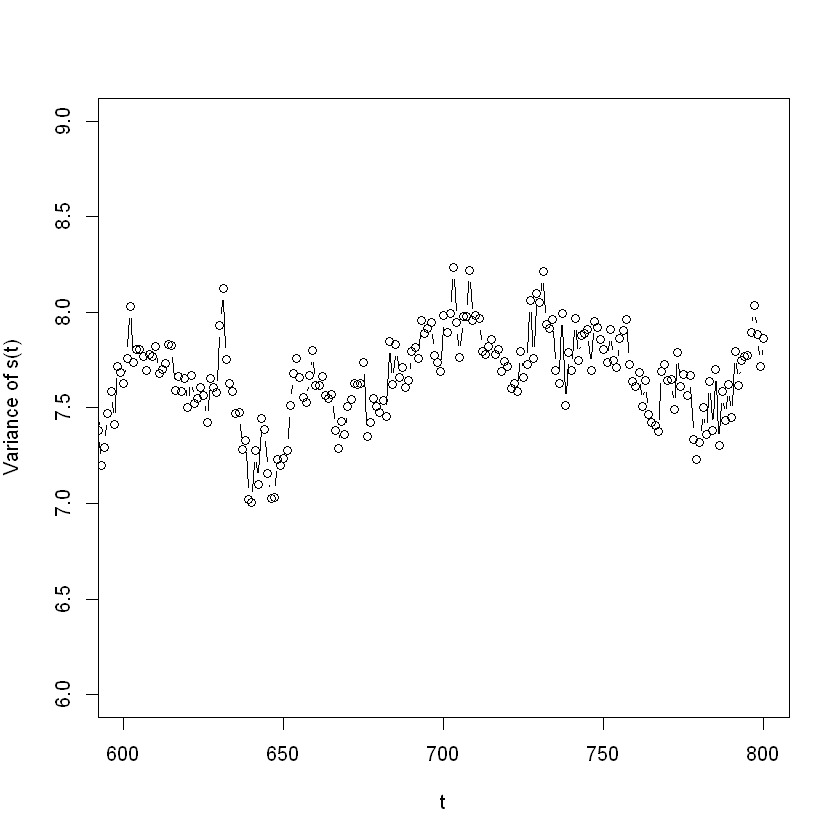

In [136]:
plot(colMeans(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'), xlim=c(600, 800), ylim=c(6,8))
plot(colVars(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'), xlim=c(600, 800), ylim=c(6,9))

In [125]:
png(sprintf("plots/p1q2_2_b_1.png"))
plot(colMeans(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/p1q2_2_b_2.png"))
plot(colVars(gg_shortest_dists), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

## (c)

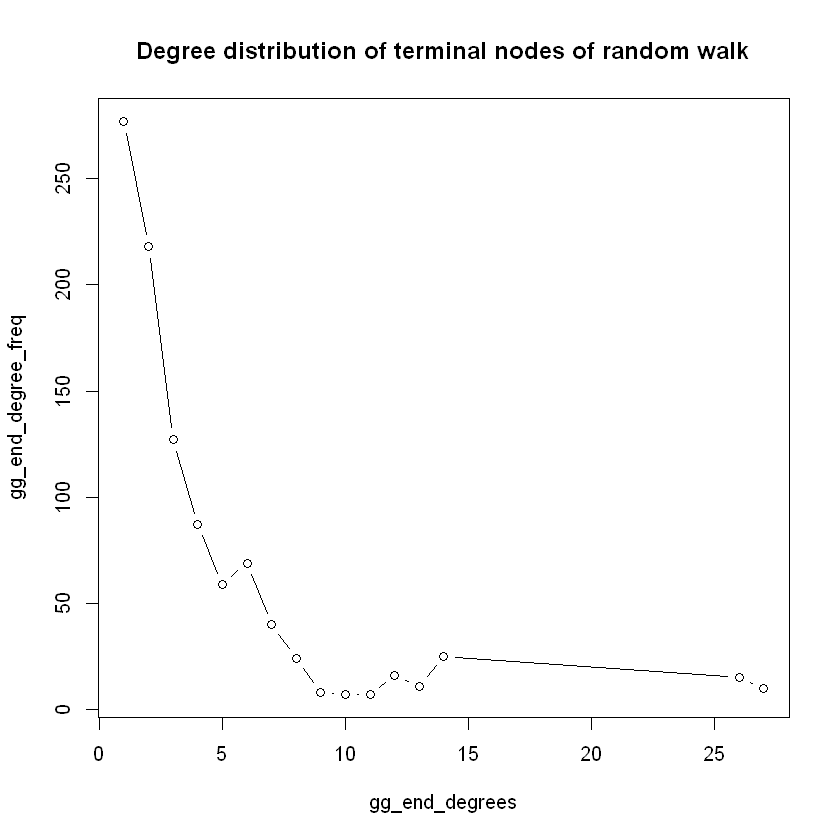

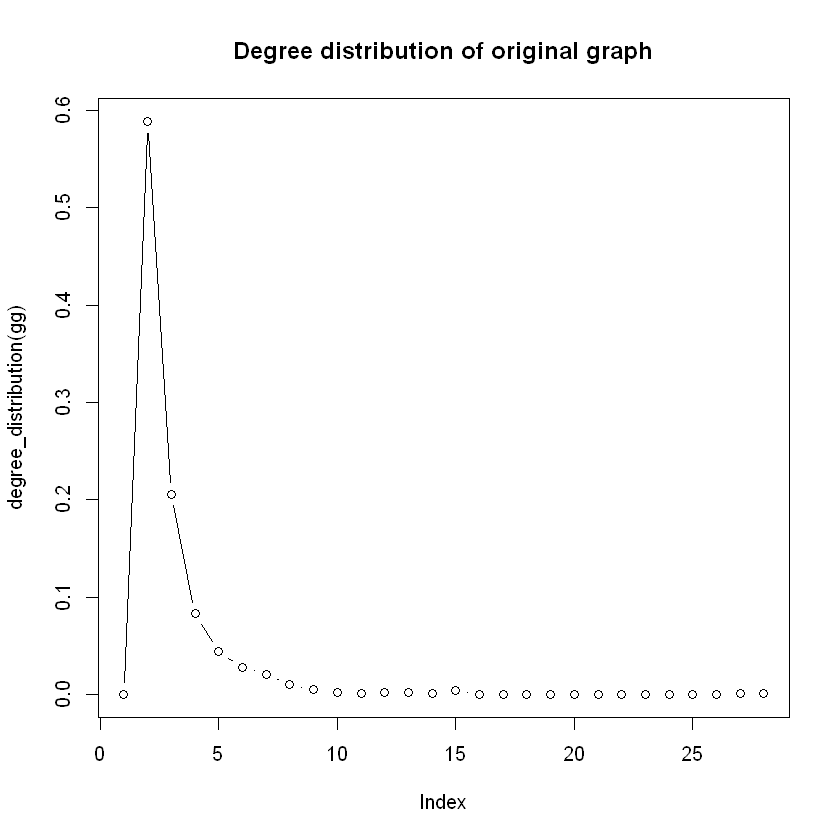

In [126]:
list[gg_end_degrees, gg_end_degree_freq] <- get_freq_distr(gg_terminal_node_deg)
plot(gg_end_degrees, gg_end_degree_freq, type="b", main="Degree distribution of terminal nodes of random walk")
plot(degree_distribution(gg), type="b", main="Degree distribution of original graph")

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

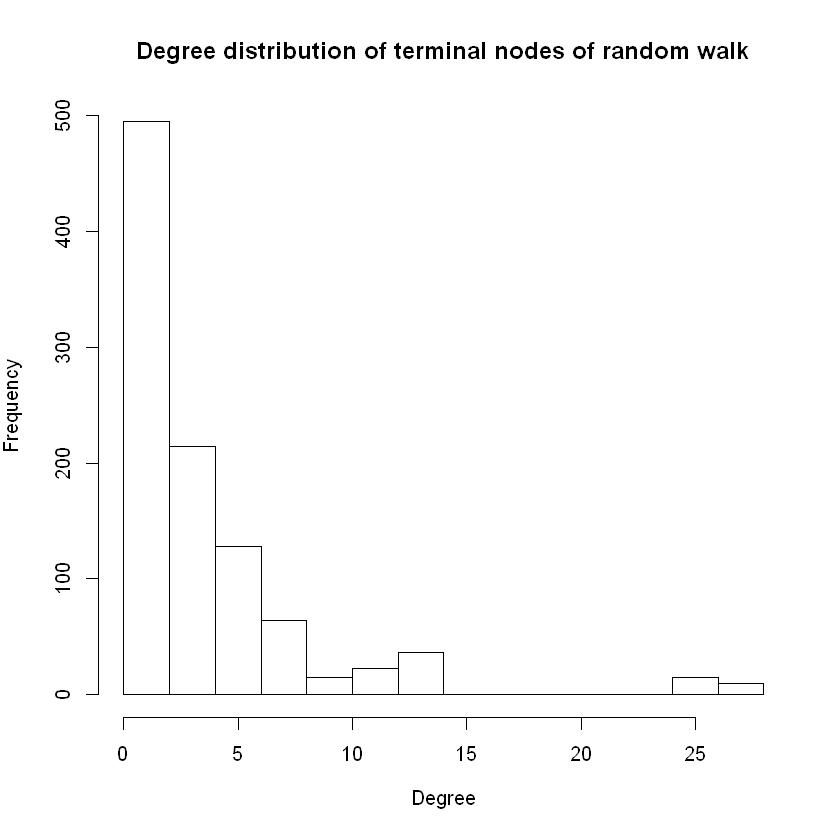

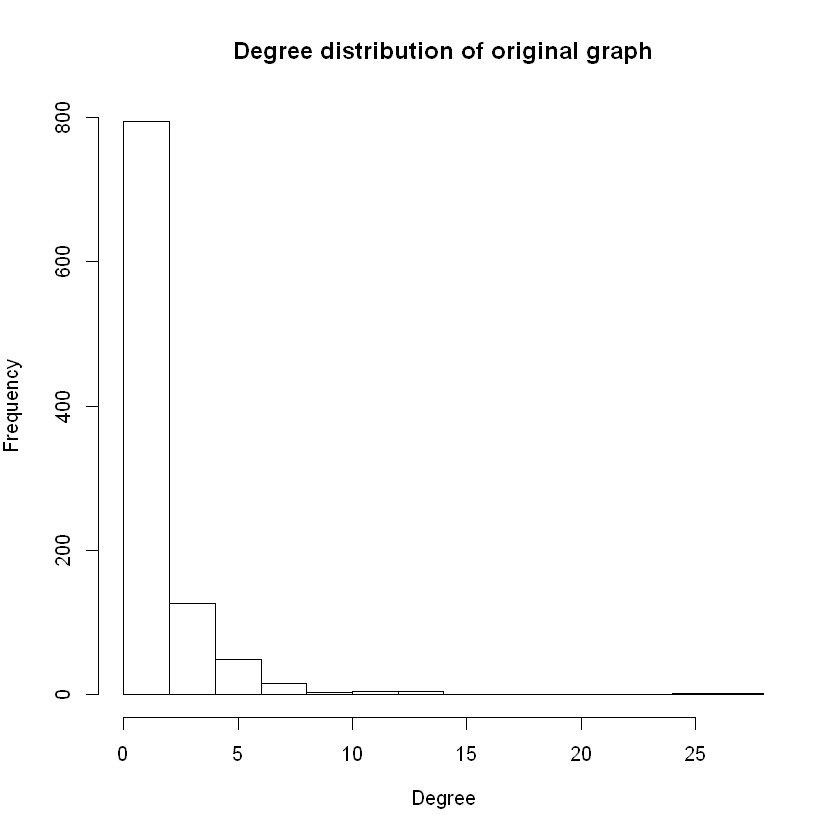

In [127]:
hist(gg_terminal_node_deg, type="b", main="Degree distribution of terminal nodes of random walk", xlab=TeX('Degree'), ylab=TeX('Frequency'))
hist(degree(gg), type="b", main="Degree distribution of original graph", xlab=TeX('Degree'), ylab=TeX('Frequency'))

In [128]:
png(sprintf("plots/p1q2_2_c_1_end1.png"))
#plot(degrees, degree_freq, type="b", xlab=TeX('Degree'), ylab=TeX('Probability'))
hist(gg_terminal_node_deg, type="b", main="", xlab=TeX('Degree'), ylab=TeX('Frequency'))
dev.off()
png(sprintf("plots/p1q2_2_c_2_original1.png"))
#plot(degree_distribution(g), type="b", xlab=TeX('Degree'), ylab=TeX('Probability'))
hist(degree(gg), type="b", main="", xlab=TeX('Degree'), ylab=TeX('Frequency'))
dev.off()

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

png 
  2

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

png 
  2

In [61]:
png(sprintf("plots/p1q2_2_c_1_end.png"))
plot(gg_end_degrees, gg_end_degree_freq, type="b", xlab=TeX('Degree'), ylab=TeX('Probability'))
dev.off()
png(sprintf("plots/p1q2_2_c_2_original.png"))
plot(degree_distribution(gg), type="b", xlab=TeX('Degree'), ylab=TeX('Probability'))
dev.off()

png 
  2

png 
  2

#### (d)

In [63]:
gg1 <- sample_pa(n=100, m=1, directed=F)
gg2 <- sample_pa(n=10000, m=1, directed=F)

In [114]:
list[shortest_dists11, terminal_node_deg11] <- perform_random_walk(gg1, steps=100)


In [123]:
list[shortest_dists22, terminal_node_deg22] <- perform_random_walk(gg2, steps=3000)

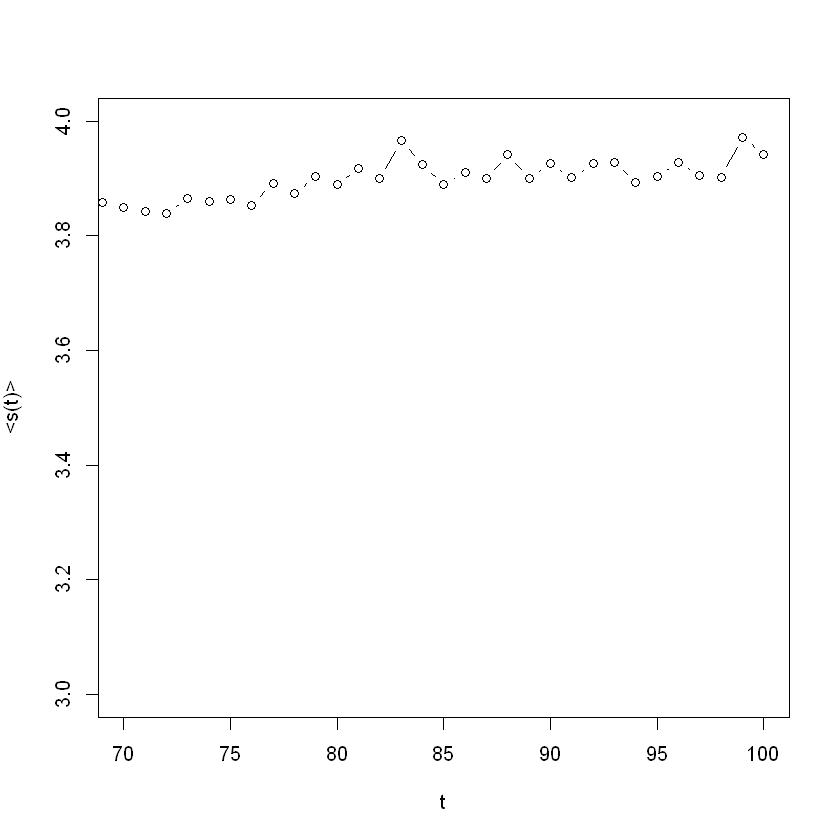

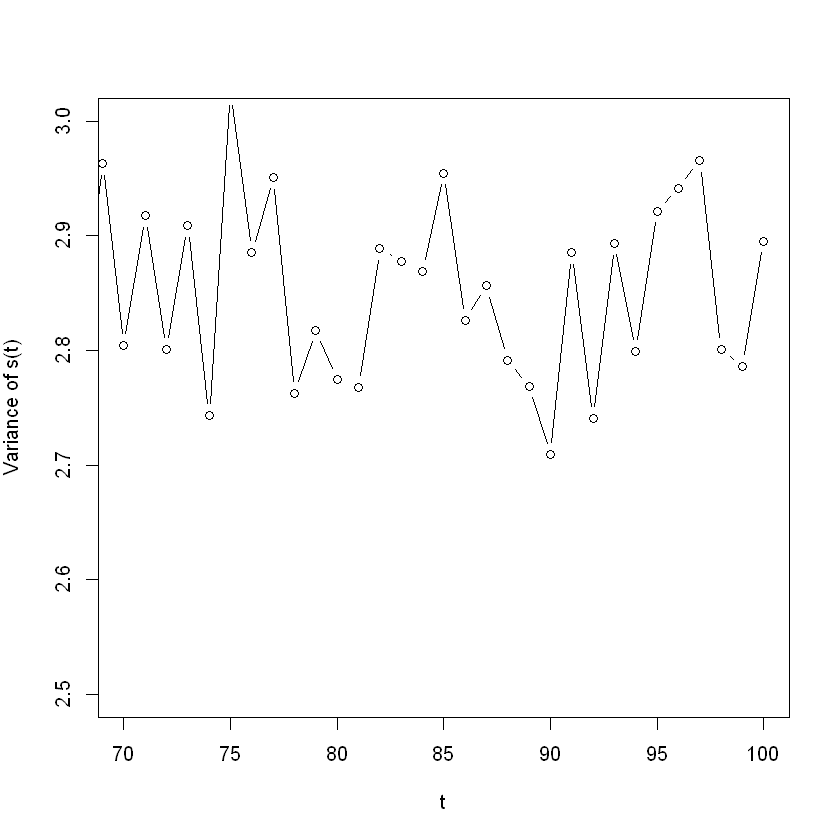

In [137]:
plot(colMeans(shortest_dists11), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'), xlim=c(70, 100), ylim=c(3,4))
plot(colVars(shortest_dists11), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'), xlim=c(70, 100), ylim=c(2.5,3))

In [129]:
png(sprintf("plots/p1q2_2_d_1_1.png"))
plot(colMeans(shortest_dists11), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/p1q2_2_d_1_2.png"))
plot(colVars(shortest_dists11), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

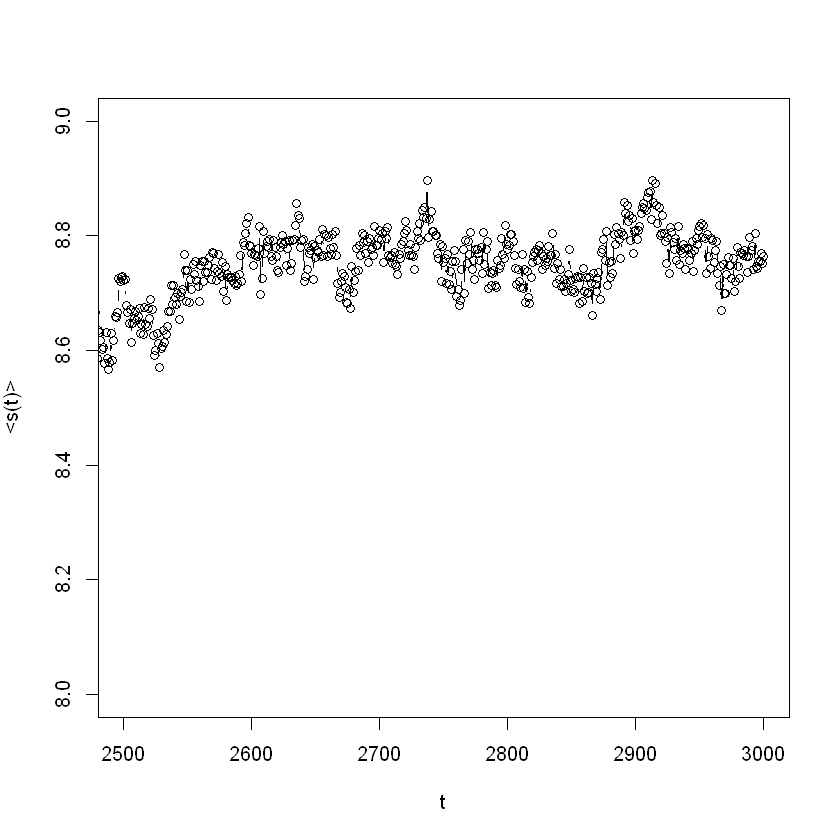

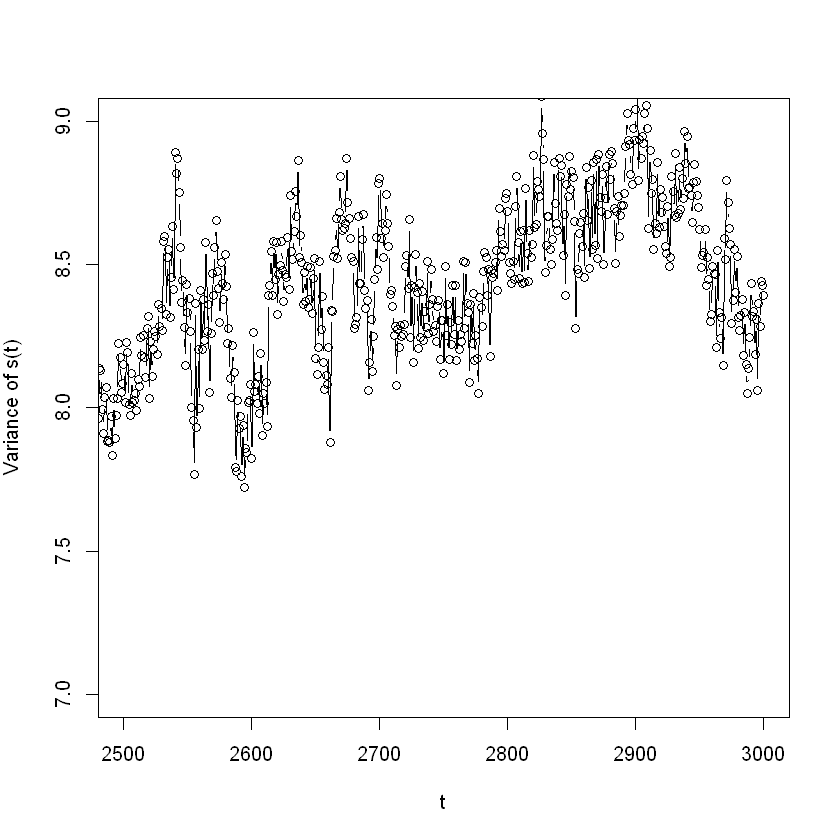

In [140]:
plot(colMeans(shortest_dists22), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'), xlim=c(2500, 3000), ylim=c(8,9))
plot(colVars(shortest_dists22), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'), xlim=c(2500, 3000), ylim=c(7,9))

In [130]:
png(sprintf("plots/p1q2_2_d_2_1.png"))
plot(colMeans(shortest_dists22), type="b", xlab=TeX('$t$'), ylab=TeX('$<s(t)>$'))
dev.off()
png(sprintf("plots/p1q2_2_d_2_2.png"))
plot(colVars(shortest_dists22), type="b", xlab=TeX('$t$'), ylab=TeX('Variance of $s(t)$'))
dev.off()

png 
  2

png 
  2

In [132]:
diameter(gg)

[1] 23

In [133]:
diameter(gg1)

[1] 10

In [134]:
diameter(gg2)

[1] 29